In [85]:
## Importing libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline


## Fetching data and filtering them 

All the text we had downloaded are stored in the 'data/raw/html_files'. 

Next task is to tag these files to their corresponding sentiments from our 'Sentiment data' File which will later serve as a label for the classification

In [21]:
## Setting project home
proj_home = '/home/smaharana1/sec_sentiment'
os.chdir(proj_home)

In [4]:
## getting data for files and sentiment
sent_file_path = os.path.join(proj_home,"data","raw","Final_Data_with_Sentiment_data.csv")
sentiment_file = pd.read_csv(sent_file_path)

In [5]:
## files downloaded
dwld_files = os.listdir(os.path.join(proj_home,"data","raw","html_files"))


In [6]:
## check if file is dwlded
sentiment_file['is_file_downloaded'] = sentiment_file['File_path'].apply(lambda x : x.split("/")[-1] if x.split("/")[-1] in dwld_files else False)

In [118]:
### Filtering Files for which we have downloaded the SEC text data from cluster
df = sentiment_file[sentiment_file['is_file_downloaded']!=False]
df = df.reset_index()

In [119]:
## Setting path for fetching saved data
file_path = os.path.join(proj_home,"data","raw","html_files")

In [120]:
## prefixing the file with the correct file path
df['is_file_downloaded'] = str(file_path) + "/" + df['is_file_downloaded'].map(str)

In [121]:
## Storing the textual data as a series
df['text'] =df['is_file_downloaded'].apply(lambda x: open(x).read())

In [122]:
## categorizing the sentiment as 1/0 for pos and neg
df['sentiment'] = df['sentiment'].apply(lambda x: 1 if x=='pos' else 0)

In [123]:
## storing the length of the text, (word count)
df['text_len']= df['text'].apply(lambda x: len(x.split()))

In [125]:
df = df[df['text_len']>5].reset_index()
df.shape

(17762, 17)

17762 rows have SEC text data in them. 

But these have huge amount of data in several of them

### Vizualizing the distribution of length of 'SEC text' 

/usr/lib64/python3.4/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


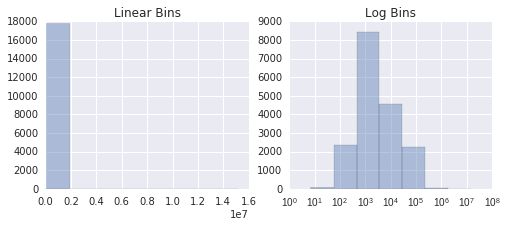

In [130]:
fig, ax = plt.subplots(1,2,figsize=(8, 3))

sns.distplot(df['text_len'].values,bins=8,kde=False,ax=ax[0])
ax[0].set_title('Linear Bins')

LogMin, LogMax = np.log10(df['text_len'].min()),np.log10(df['text_len'].max())
newBins = np.logspace(LogMin, LogMax,8)
sns.distplot(df['text_len'].values,bins=newBins,kde=False,ax=ax[1])
ax[1].set_xscale('log')
ax[1].set_title('Log Bins')

fig.show()

The mean text length is around is 1000 words

In [131]:
## saving interim data
df.to_csv('data/interim/17k_11_24_2018_00_20.csv')

### Cleaning stopwords and other characters


In [ ]:
def textClean(text):
    text = re.sub(r"[^A-Za-z^,!.\/'+-=]", " ", str(text))
    text = text.lower().split()
    stops = {'so', 'his', 't', 'y', 'ours', 'herself', 
             'your', 'all', 'some', 'they', 'i', 'of', 'didn', 
             'them', 'when', 'will', 'that', 'its', 'because', 
             'while', 'those', 'my', 'don', 'again', 'her', 'if',
             'further', 'now', 'does', 'against', 'won', 'same', 
             'a', 'during', 'who', 'here', 'have', 'in', 'being', 
             'it', 'other', 'once', 'itself', 'hers', 'after', 're',
             'just', 'their', 'himself', 'theirs', 'whom', 'then', 'd', 
             'out', 'm', 'mustn', 'where', 'below', 'about', 'isn',
             'shouldn', 'wouldn', 'these', 'me', 'to', 'doesn', 'into',
             'the', 'until', 'she', 'am', 'under', 'how', 'yourself',
             'couldn', 'ma', 'up', 'than', 'from', 'themselves', 'yourselves',
             'off', 'above', 'yours', 'having', 'mightn', 'needn', 'on', 
             'too', 'there', 'an', 'and', 'down', 'ourselves', 'each',
             'hadn', 'ain', 'such', 've', 'did', 'be', 'or', 'aren', 'he', 
             'should', 'for', 'both', 'doing', 'this', 'through', 'do', 'had',
             'own', 'but', 'were', 'over', 'not', 'are', 'few', 'by', 
             'been', 'most', 'no', 'as', 'was', 'what', 's', 'is', 'you', 
             'shan', 'between', 'wasn', 'has', 'more', 'him', 'nor',
             'can', 'why', 'any', 'at', 'myself', 'very', 'with', 'we', 
             'which', 'hasn', 'weren', 'haven', 'our', 'll', 'only',
             'o', 'before'}
    text = [w for w in text if not w in stops]    
    text = " ".join(text)
    text = text.replace("."," ").replace(","," ")
    return(text)

In [ ]:
import re
df['text'] = df['text'].apply(textClean)
df['text_len'] = df['text'].apply(lambda x: len(x.split()))
df = df[df['text_len']>5]

In [1]:
df.to_csv('data/interim/17k_11_24_2018_14_09.csv')

NameError: name 'df' is not defined